In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import zarr
import time
import netCDF4 as nc
import h5py

In [2]:
def calc_flushing(IS, CS, stucked, Eastern):
    IS = np.load(IS)
    CS = np.load(CS)
    E = np.load(Eastern)
    
    stucked = np.load(stucked)
    stucked[CS>1095] = 1 
    
    E[~np.isnan(CS)] = np.nan
    
    num = int(len(IS)/366)
    
    flush1 = []
    flush2 = []
    flush3 = []
    rates = []
    for i in range(0, int(len(IS)), num):
        flags = stucked[i:i+num]
        n = np.count_nonzero(flags==0)
        
        sub = CS[i:i+num]
        subE = E[i:i+num]
    
        sub = sub[flags == 0]
        subE = subE[~np.isnan(subE)]
    
        hist, _ = np.histogram(sub, np.arange(0, 1096,1))
        hist2, _ = np.histogram(subE, np.arange(0,1096,1))
        
        exit_percent = np.asarray(np.cumsum(hist) / n * 100)
        exit_percent2 = np.asarray(np.cumsum(hist2) / n * 100)
        
        f = np.asarray([v for v in exit_percent])
        r = np.asarray([np.count_nonzero(sub==v) for v in np.arange(0, 1096, 1)])
        r = r/n*100
        
        f2 = np.asarray([v for v in exit_percent2])
        r2 = np.asarray([np.count_nonzero(subE==v) for v in np.arange(0, 1096, 1)])
        r2 = r2/n*100
        
        rates.append(r)
        flush1.append(f)
        flush2.append(f2)
        flush3.append(100 - (f+f2))
    
    return np.asarray(flush1), np.asarray(flush2)#, np.asarray(flush3), np.asarray(rates)

In [3]:
def calc_rates(IS, CS, stucked, Eastern):
    IS = np.load(IS)
#     IS[IS>180] = np.nan
    
#     CS = np.load(CS)
#     CS = CS - IS
#     CS[CS>910] = np.nan
    
#     CS = CS + IS

    
    CS = np.load(CS)
    
    E = np.load(Eastern)
    
    stucked = np.load(stucked)
#     stucked[CS>1095] = 1 
    
    E[~np.isnan(CS)] = np.nan
    
    num = int(len(IS)/366)
    
    r1 = []
    r2 = []
    for i in range(0, int(len(IS)), num):
        flags = stucked[i:i+num]
        n = np.count_nonzero(flags==0)
#         print(n/num*100)
        
        sub = CS[i:i+num]
        subE = E[i:i+num]
    
        sub = sub[flags == 0]
        subE = subE[~np.isnan(subE)]
    
        hist, _ = np.histogram(sub, np.arange(0, 1096,1))
        hist2, _ = np.histogram(subE, np.arange(0,1096,1))
        
        
        
        r1.append(hist/n*100)
        r2.append(hist2/n*100)
    
    return np.asarray(r1), np.asarray(r2)#, np.asarray(flush3), np.asarray(rates)

In [4]:
pineisland_off, pineisland_east = calc_flushing(IS = 'processed_dataGL/pineisland_0d_IS.npy',
                                        CS = 'processed_dataGL/pineisland_0d_CS.npy',
                                        Eastern = 'processed_dataGL/pineisland_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/pineisland_0d_Stucked.npy')

In [5]:
pineisland_off_rates, pineisland_east_rates = calc_rates(IS = 'processed_dataGL/pineisland_0d_IS.npy',
                                        CS = 'processed_dataGL/pineisland_0d_CS.npy',
                                        Eastern = 'processed_dataGL/pineisland_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/pineisland_0d_Stucked.npy')

In [6]:
thwaites_off, thwaites_east = calc_flushing(IS = 'processed_dataGL/thwaites_0d_IS.npy',
                                        CS = 'processed_dataGL/thwaites_0d_CS.npy',
                                        Eastern = 'processed_dataGL/thwaites_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/thwaites_0d_Stucked.npy')

In [7]:
thwaites_off_rates, thwaites_east_rates = calc_rates(IS = 'processed_dataGL/thwaites_0d_IS.npy',
                                        CS = 'processed_dataGL/thwaites_0d_CS.npy',
                                        Eastern = 'processed_dataGL/thwaites_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/thwaites_0d_Stucked.npy')

In [8]:
smith_off, smith_east = calc_flushing(IS = 'processed_dataGL/smith_0d_IS.npy',
                                        CS = 'processed_dataGL/smith_0d_CS.npy',
                                        Eastern = 'processed_dataGL/smith_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/smith_0d_Stucked.npy')

In [9]:
smith_off_rates, smith_east_rates = calc_rates(IS = 'processed_dataGL/smith_0d_IS.npy',
                                        CS = 'processed_dataGL/smith_0d_CS.npy',
                                        Eastern = 'processed_dataGL/smith_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/smith_0d_Stucked.npy')

In [10]:
kohler_off, kohler_east = calc_flushing(IS = 'processed_dataGL/kohler_0d_IS.npy',
                                        CS = 'processed_dataGL/kohler_0d_CS.npy',
                                        Eastern = 'processed_dataGL/kohler_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/kohler_0d_Stucked.npy')

In [11]:
kohler_off_rates, kohler_east_rates = calc_rates(IS = 'processed_dataGL/kohler_0d_IS.npy',
                                        CS = 'processed_dataGL/kohler_0d_CS.npy',
                                        Eastern = 'processed_dataGL/kohler_0d_Eastern.npy',
                                        stucked = 'processed_dataGL/kohler_0d_Stucked.npy')

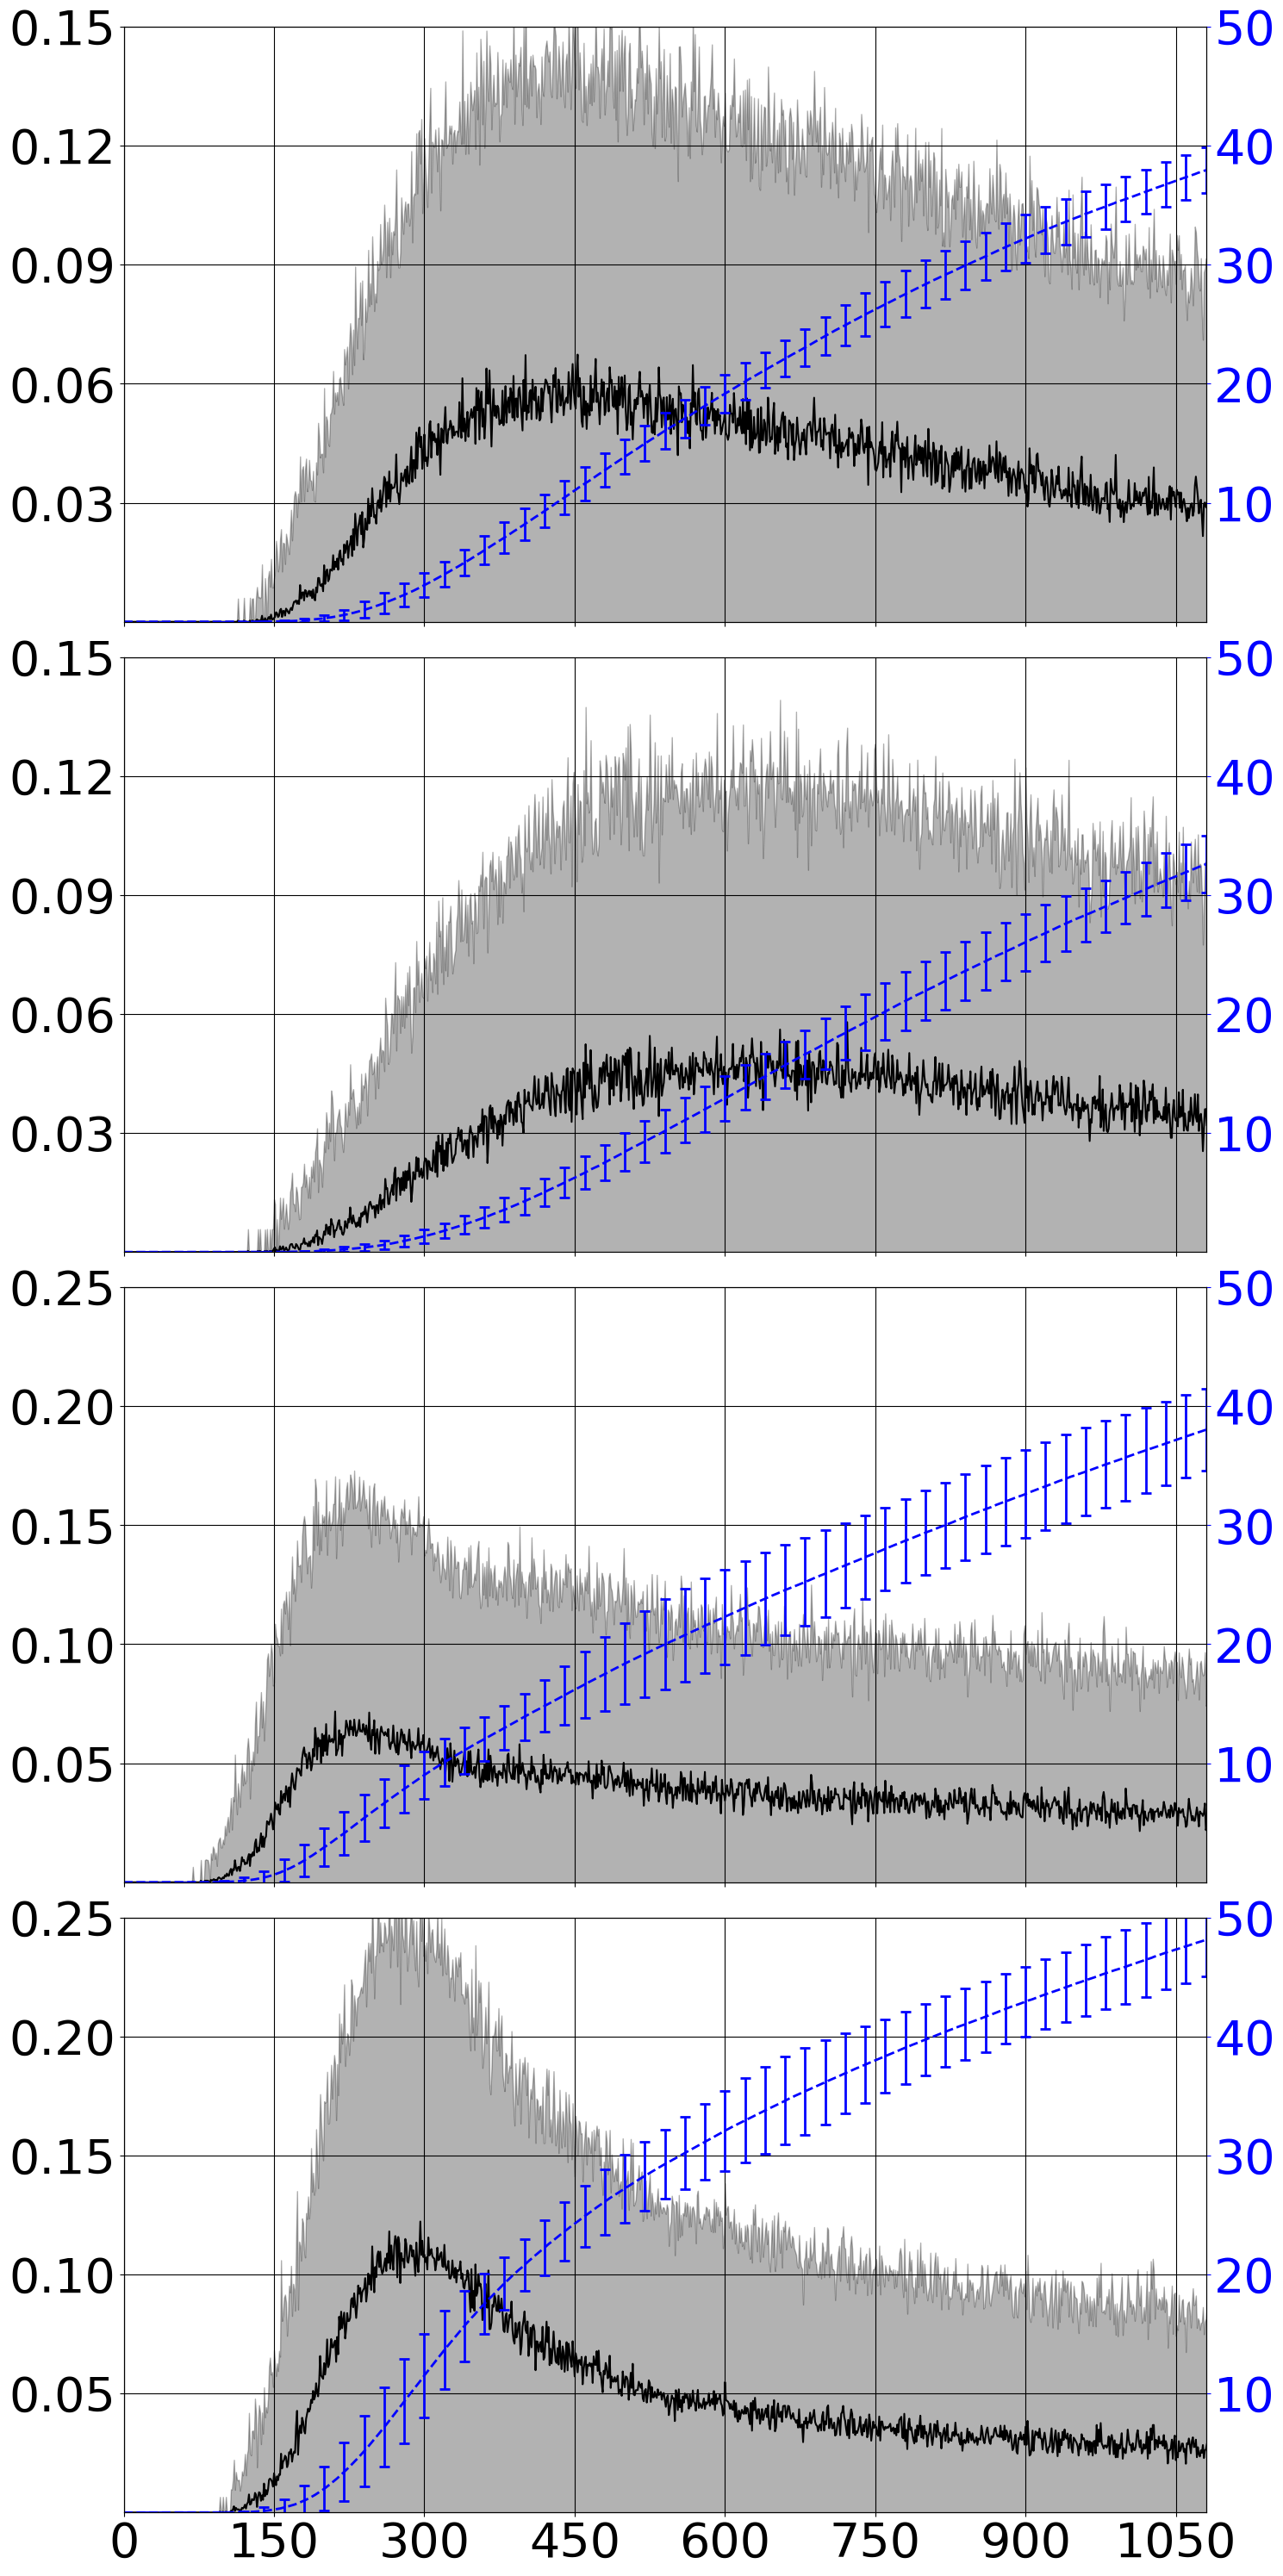

In [12]:
fig, ax = plt.subplots(figsize=(15,30), nrows=4, sharex=True)

ax[0].plot(np.arange(0,1095), np.nanmean(pineisland_off_rates, axis=0), c='k')
ax[0].fill_between(np.arange(0,1095),
                   np.nanmean(pineisland_off_rates, axis=0) - (np.nanstd(pineisland_off_rates, axis=0)/1),
                   np.nanmean(pineisland_off_rates, axis=0) + (np.nanstd(pineisland_off_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[0].set_ylim(0, 0.15)
ax[0].set_yticks([0.03, 0.06, 0.09, 0.12, 0.15])

ax0=ax[0].twinx()
ax0.errorbar(np.arange(0,1095),
             np.nanmean(pineisland_off,axis=0), fmt = '--b',
             yerr=(np.nanstd(pineisland_off, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax0.set_ylim(0,50)
ax0.set_yticks([10, 20, 30, 40, 50])
ax0.tick_params(axis='both', labelsize=40, colors='b')

## Thwaites
ax[1].plot(np.arange(0,1095), np.nanmean(thwaites_off_rates, axis=0), c='k')
ax[1].fill_between(np.arange(0,1095),
                   np.nanmean(thwaites_off_rates, axis=0) - (np.nanstd(thwaites_off_rates, axis=0)/1),
                   np.nanmean(thwaites_off_rates, axis=0) + (np.nanstd(thwaites_off_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[1].set_ylim(0, 0.15)
ax[1].set_yticks([0.03, 0.06, 0.09, 0.12, 0.15])

ax1=ax[1].twinx()
ax1.errorbar(np.arange(0,1095),
             np.nanmean(thwaites_off,axis=0), fmt = '--b',
             yerr=(np.nanstd(thwaites_off, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax1.set_ylim(0,50)
ax1.set_yticks([10, 20, 30, 40, 50])
ax1.tick_params(axis='both', labelsize=40, colors='b')

## Smith
ax[2].plot(np.arange(0,1095), np.nanmean(smith_off_rates, axis=0), c='k')
ax[2].fill_between(np.arange(0,1095),
                   np.nanmean(smith_off_rates, axis=0) - (np.nanstd(smith_off_rates, axis=0)/1),
                   np.nanmean(smith_off_rates, axis=0) + (np.nanstd(smith_off_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[2].set_ylim(0, 0.25)
ax[2].set_yticks([0.05, 0.1, 0.15, 0.2, 0.25])

ax2=ax[2].twinx()
ax2.errorbar(np.arange(0,1095),
             np.nanmean(smith_off,axis=0), fmt = '--b',
             yerr=(np.nanstd(smith_off, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax2.set_ylim(0,50)
ax2.set_yticks([10, 20, 30, 40, 50])
ax2.tick_params(axis='both', labelsize=40, colors='b')

## Kohler
ax[3].plot(np.arange(0,1095), np.nanmean(kohler_off_rates, axis=0), c='k')
ax[3].fill_between(np.arange(0,1095),
                   np.nanmean(kohler_off_rates, axis=0) - (np.nanstd(kohler_off_rates, axis=0)/1),
                   np.nanmean(kohler_off_rates, axis=0) + (np.nanstd(kohler_off_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[3].set_ylim(0, 0.25)
ax[3].set_yticks([0.05, 0.1, 0.15, 0.2, 0.25])

ax3=ax[3].twinx()
ax3.errorbar(np.arange(0,1095),
             np.nanmean(kohler_off,axis=0), fmt = '--b',
             yerr=(np.nanstd(kohler_off, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax3.set_ylim(0,50)
ax3.set_yticks([10, 20, 30, 40, 50])
ax3.tick_params(axis='both', labelsize=40, colors='b')

for a in ax.flat:
    a.set_xlim(0, 1080)
    a.tick_params(axis='both', labelsize=40)
    a.grid(c='black')
    
ax[3].set_xticks(np.arange(0, 1090, 150))
    
plt.tight_layout()
plt.savefig('img_rates/off_shelf.png',dpi=300)

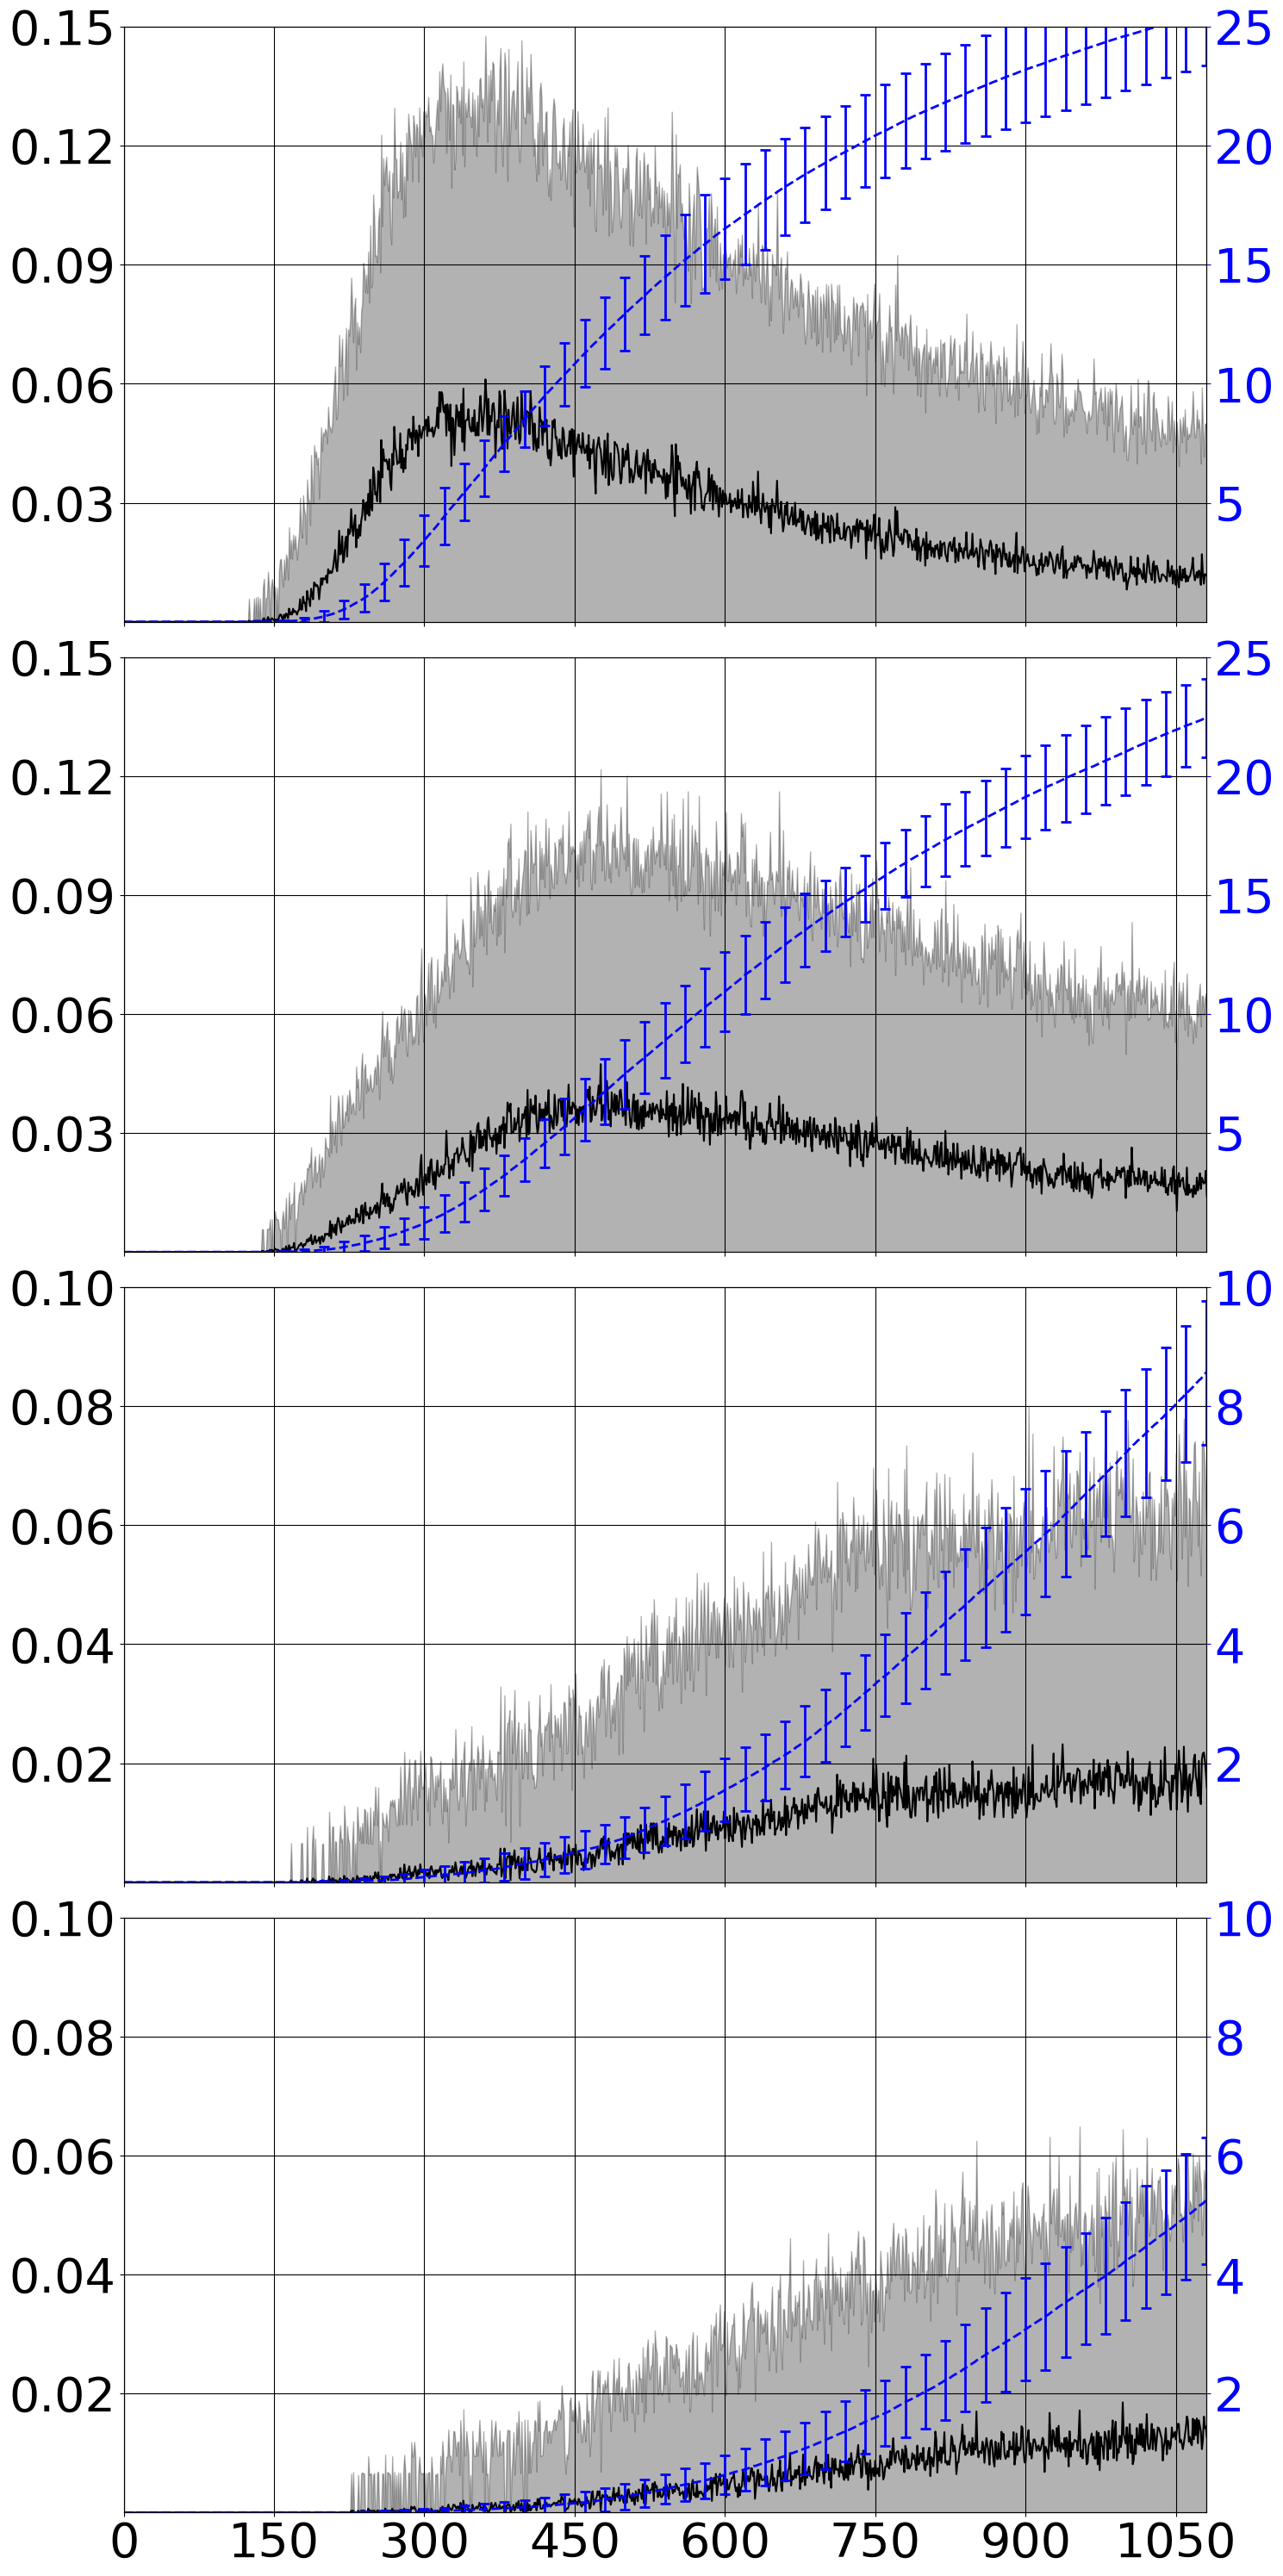

In [13]:
fig, ax = plt.subplots(figsize=(15,30), nrows=4, sharex=True)

ax[0].plot(np.arange(0,1095), np.nanmean(pineisland_east_rates, axis=0), c='k')
ax[0].fill_between(np.arange(0,1095),
                   np.nanmean(pineisland_east_rates, axis=0) - (np.nanstd(pineisland_east_rates, axis=0)/1),
                   np.nanmean(pineisland_east_rates, axis=0) + (np.nanstd(pineisland_east_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[0].set_ylim(0, 0.15)
ax[0].set_yticks([0.03, 0.06, 0.09, 0.12, 0.15])

ax0=ax[0].twinx()
ax0.errorbar(np.arange(0,1095),
             np.nanmean(pineisland_east,axis=0), fmt = '--b',
             yerr=(np.nanstd(pineisland_east, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax0.set_ylim(0,25)
ax0.set_yticks([5, 10, 15, 20, 25])
ax0.tick_params(axis='both', labelsize=40, colors='b')

## Thwaites
ax[1].plot(np.arange(0,1095), np.nanmean(thwaites_east_rates, axis=0), c='k')
ax[1].fill_between(np.arange(0,1095),
                   np.nanmean(thwaites_east_rates, axis=0) - (np.nanstd(thwaites_east_rates, axis=0)/1),
                   np.nanmean(thwaites_east_rates, axis=0) + (np.nanstd(thwaites_east_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[1].set_ylim(0, 0.15)
ax[1].set_yticks([0.03, 0.06, 0.09, 0.12, 0.15])

ax1=ax[1].twinx()
ax1.errorbar(np.arange(0,1095),
             np.nanmean(thwaites_east,axis=0), fmt = '--b',
             yerr=(np.nanstd(thwaites_east, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax1.set_ylim(0,25)
ax1.set_yticks([5, 10, 15, 20, 25])
ax1.tick_params(axis='both', labelsize=40, colors='b')

## Smith
ax[2].plot(np.arange(0,1095), np.nanmean(smith_east_rates, axis=0), c='k')
ax[2].fill_between(np.arange(0,1095),
                   np.nanmean(smith_east_rates, axis=0) - (np.nanstd(smith_east_rates, axis=0)/1),
                   np.nanmean(smith_east_rates, axis=0) + (np.nanstd(smith_east_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[2].set_ylim(0, 0.10)
ax[2].set_yticks([0.02, 0.04, 0.06, 0.08, 0.10])

ax2=ax[2].twinx()
ax2.errorbar(np.arange(0,1095),
             np.nanmean(smith_east,axis=0), fmt = '--b',
             yerr=(np.nanstd(smith_east, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax2.set_ylim(0,10)
ax2.set_yticks([2, 4, 6, 8, 10])
ax2.tick_params(axis='both', labelsize=40, colors='b')

## Kohler
ax[3].plot(np.arange(0,1095), np.nanmean(kohler_east_rates, axis=0), c='k')
ax[3].fill_between(np.arange(0,1095),
                   np.nanmean(kohler_east_rates, axis=0) - (np.nanstd(kohler_east_rates, axis=0)/1),
                   np.nanmean(kohler_east_rates, axis=0) + (np.nanstd(kohler_east_rates, axis=0)/1),
                   alpha=0.3, color='k')
ax[3].set_ylim(0, 0.1)
ax[3].set_yticks([0.02, 0.04, 0.06, 0.08, 0.10])

ax3=ax[3].twinx()
ax3.errorbar(np.arange(0,1095),
             np.nanmean(kohler_east,axis=0), fmt = '--b',
             yerr=(np.nanstd(kohler_east, axis=0)/1),
            errorevery = (20),ecolor='b', capsize=4, capthick=2, linewidth=2)
ax3.set_ylim(0,10)
ax3.set_yticks([2, 4, 6, 8, 10])
ax3.tick_params(axis='both', labelsize=40, colors='b')

for a in ax.flat:
    a.set_xlim(0, 1080)
    a.tick_params(axis='both', labelsize=40)
    a.grid(c='black')
    
ax[3].set_xticks(np.arange(0, 1080, 150))
    
plt.tight_layout()
plt.savefig('img_rates/east_shelf.png',dpi=300)

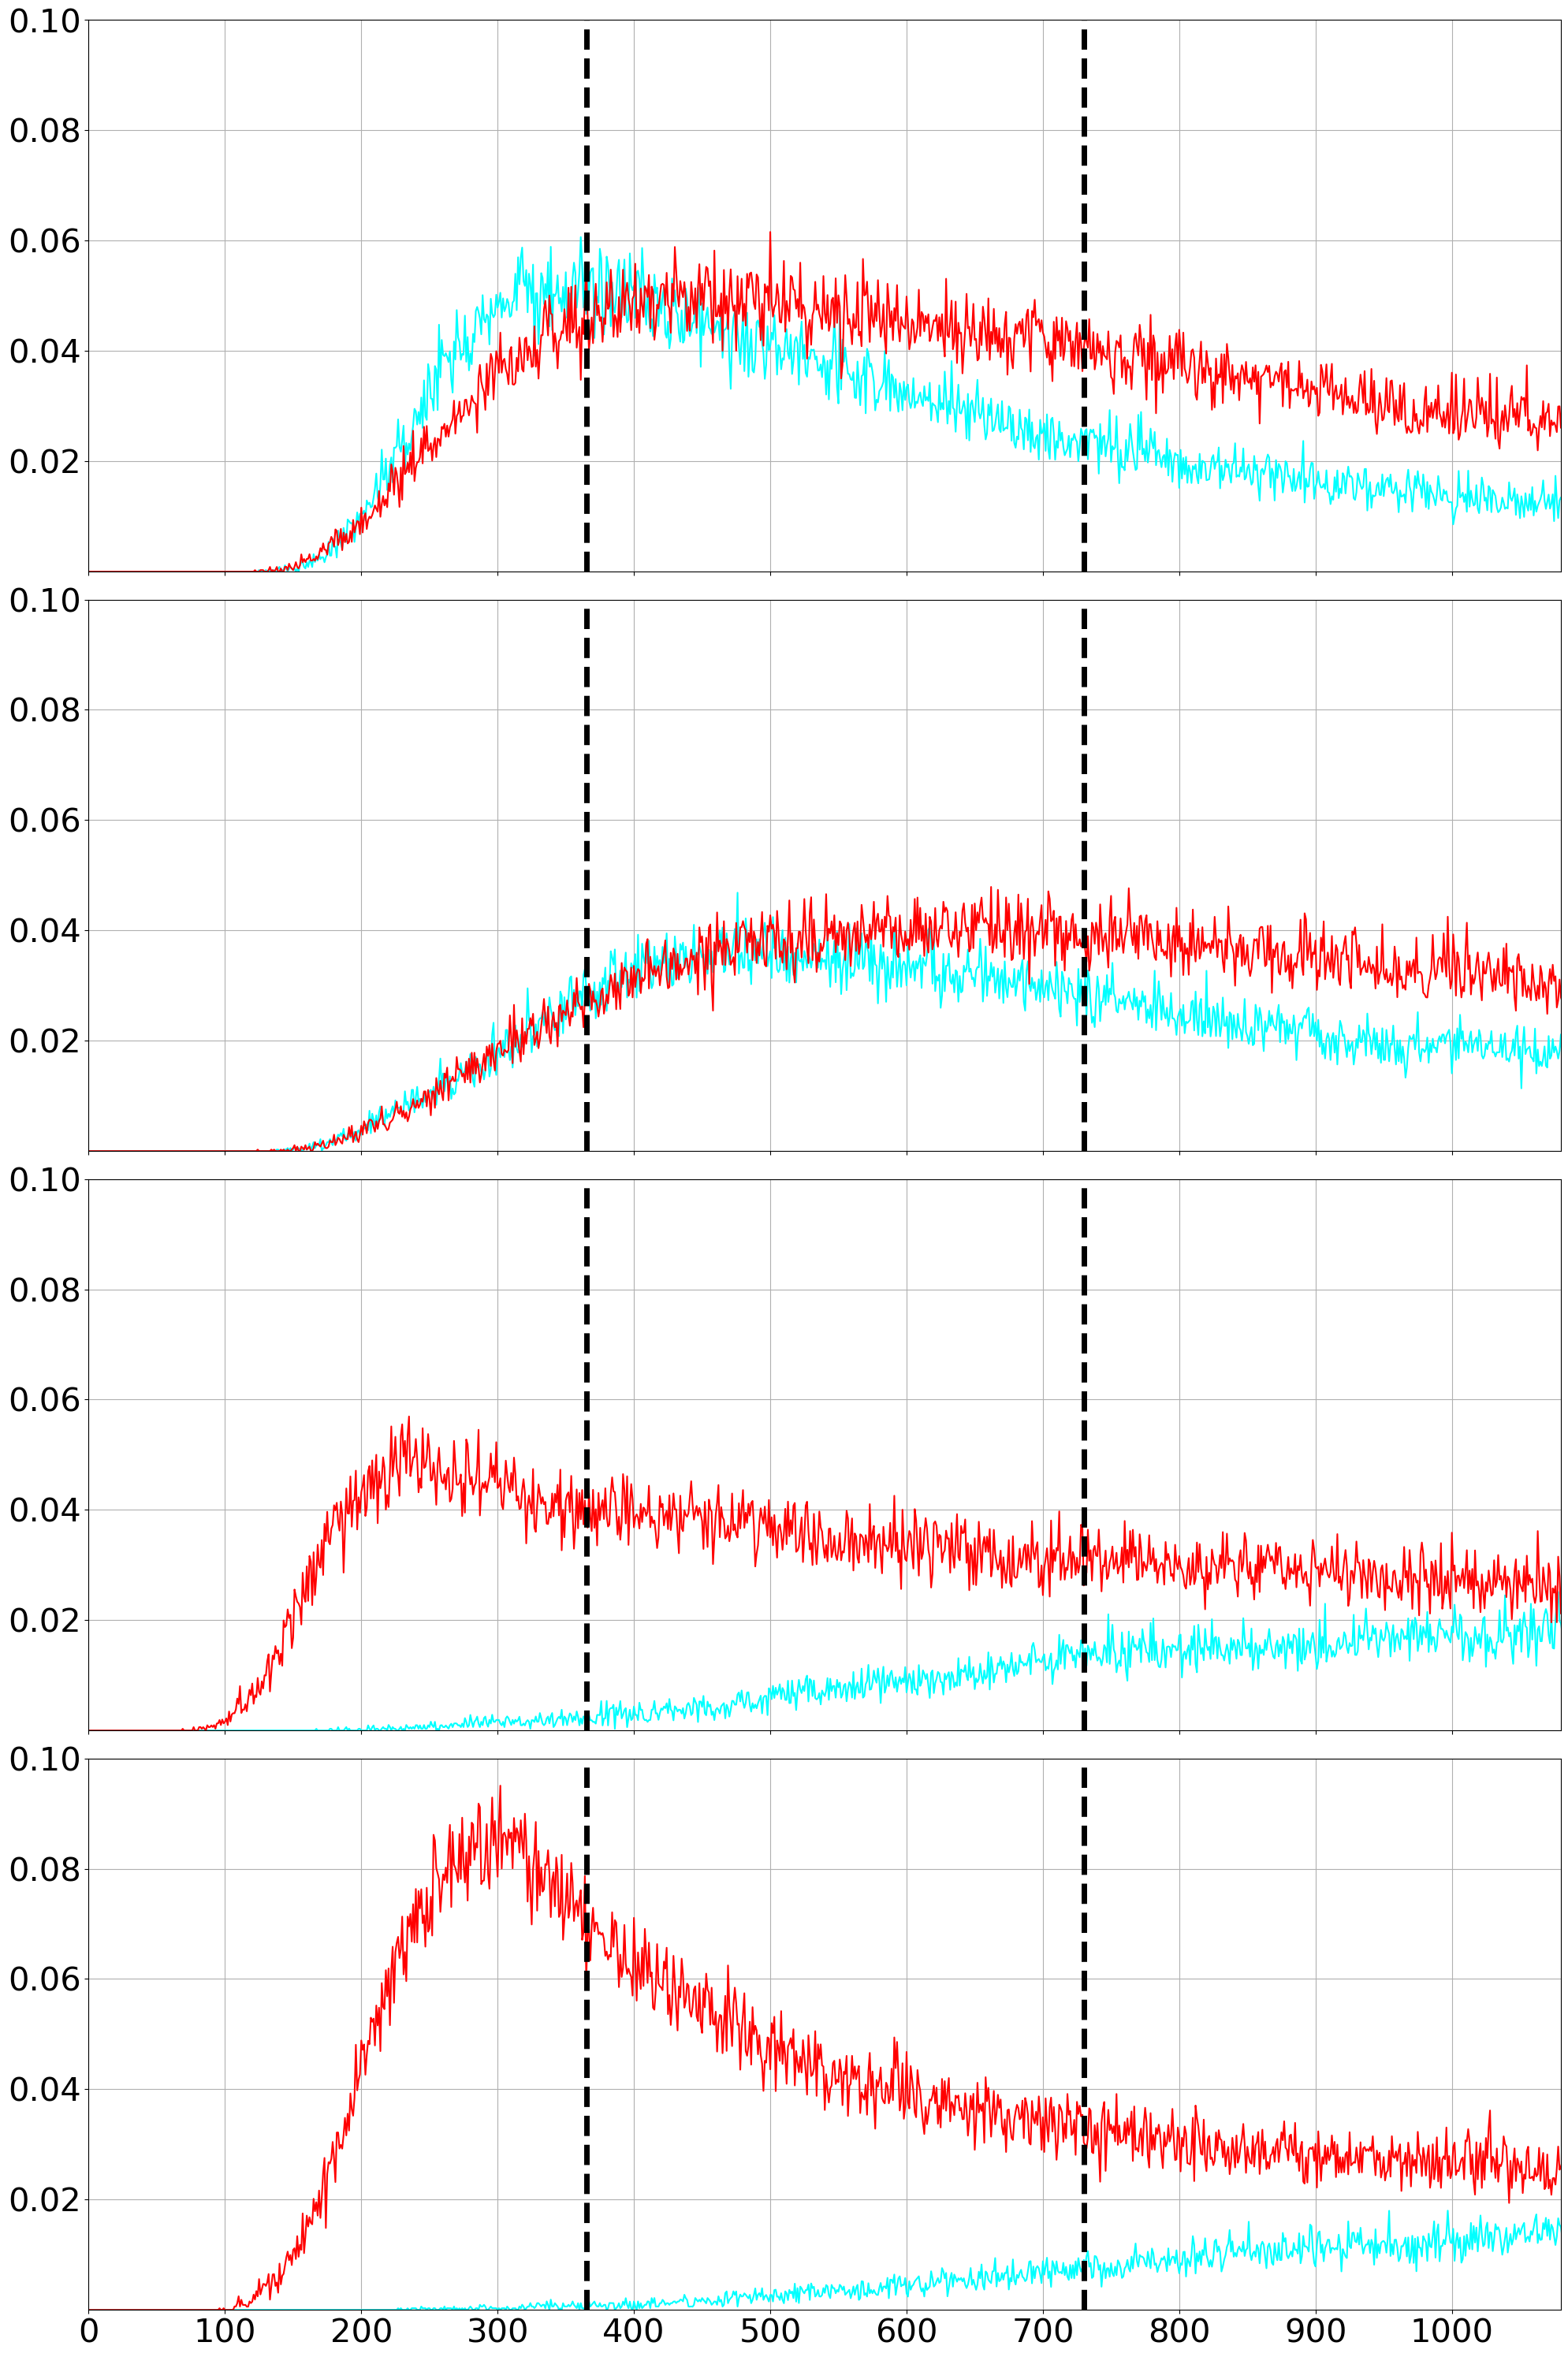

In [29]:
fig, ax = plt.subplots(figsize=(20,30), nrows=4, sharex=True)

ax[0].plot(np.arange(0,1095), np.nanmean(pineisland_east_rates, axis=0), c='cyan')
ax[0].plot(np.arange(0,1095), np.nanmean(pineisland_off_rates, axis=0), c='red')


ax[1].plot(np.arange(0,1095), np.nanmean(thwaites_east_rates, axis=0), c='cyan')
ax[1].plot(np.arange(0,1095), np.nanmean(thwaites_off_rates, axis=0), c='red')

ax[2].plot(np.arange(0,1095), np.nanmean(smith_east_rates, axis=0), c='cyan')
ax[2].plot(np.arange(0,1095), np.nanmean(smith_off_rates, axis=0), c='red')

ax[3].plot(np.arange(0,1095), np.nanmean(kohler_east_rates, axis=0), c='cyan')
ax[3].plot(np.arange(0,1095), np.nanmean(kohler_off_rates, axis=0), c='red')
   
    
ax[3].set_xticks(np.arange(0, 1001, 100))

for a in ax.flat:
    a.set_xlim(0, 1080)
    a.set_ylim(0, 0.1)
    a.set_yticks([0.02,0.04,0.06, 0.08, 0.1])
    
    a.tick_params(axis='both', labelsize=30)
    a.grid()
    
    a.plot([365, 365], [0, 0.1], '--k', lw=5)
    a.plot([730, 730], [0, 0.1], '--k', lw=5)

plt.tight_layout()

plt.savefig('img_rates/joint.png',dpi=300)